### Import Packages

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

### Open Files, Create DataFrames, Zero Null Values
#### *To keep nulls, comment 3rd var, remove "n" from dataframe var.

In [12]:
test = pd.read_csv("test.csv")
tsn = pd.DataFrame(test)
ts = tsn.fillna(0)

train = pd.read_csv("train.csv")
trn = pd.DataFrame(train)
tr = trn.fillna(0)

### Convert "LastRecord" and "Date Deployed" to Datetime

In [13]:
ts["LastRecord"], ts["Date Deployed"] = pd.to_datetime(ts["LastRecord"]), pd.to_datetime(ts["Date Deployed"])
tr["LastRecord"], tr["Date Deployed"] = pd.to_datetime(tr["LastRecord"]), pd.to_datetime(tr["Date Deployed"])

### Create "DaysInService" Column, Convert from TimeDelta to Float for Plotting

In [14]:
ts["DaysInService"] = ts["LastRecord"] - ts["Date Deployed"]
ts["DaysInService"] = ts["DaysInService"].dt.days.astype("float64")
tr["DaysInService"] = tr["LastRecord"] - tr["Date Deployed"]
tr["DaysInService"] = tr["DaysInService"].dt.days.astype("float64")

### Get Info and Head (Test)

In [15]:
ts.info()
ts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   deviceid                     4500 non-null   int64         
 1   avg_time_charging_lag1       4500 non-null   float64       
 2   avg_time_charging_lag2       4500 non-null   float64       
 3   avg_time_charging_lag3       4500 non-null   float64       
 4   avg_time_charging_lag7       4500 non-null   float64       
 5   charging_rate_lag3           4500 non-null   float64       
 6   charging_rate_lag7           4500 non-null   float64       
 7   avg_time_discharging_lag1    4500 non-null   float64       
 8   avg_time_discharging_lag2    4500 non-null   float64       
 9   avg_time_discharging_lag3    4500 non-null   float64       
 10  avg_time_discharging_lag7    4500 non-null   float64       
 11  discharging_rate_lag3        4500 non-null 

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,...,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed,DaysInService
0,42979,35.56,4.31,5.07,4.60,-0.033333,0.040000,66.29,3.77,4.07,...,346.301200,345.379600,17.481600,27.721600,4159.000000,12.437500,45.203200,2021-04-01,2019-09-08,571.0
1,14911,31.26,4.76,27.40,29.60,-0.076667,-0.060000,49.57,3.63,44.06,...,356.218261,357.305652,17.479130,27.650435,4163.608696,34.818182,45.129565,2021-04-01,2019-09-13,566.0
2,48386,30.08,5.07,4.76,4.74,0.013333,-0.016667,52.96,5.16,4.05,...,368.532667,366.844667,11.361333,16.739333,4176.133333,15.888889,28.100667,2021-04-01,2019-10-10,539.0
3,18822,33.31,32.79,5.09,4.96,0.000000,0.003333,49.26,68.54,5.83,...,352.899375,352.595000,17.168750,27.460625,4159.875000,12.750000,44.629375,2021-04-01,2019-10-13,536.0
4,49810,4.44,30.03,5.57,5.02,-0.200000,-0.030000,4.16,54.80,4.52,...,363.912800,365.208400,14.860000,23.980800,4168.400000,7.500000,38.840800,2021-04-01,2019-10-19,530.0


### Get Info and Head (Train)

In [16]:
#tr.info()
#tr.head()

### Count Null Values (Test)
#### *Keep nulls above to observe progressive linearity.

In [17]:
ts.isnull().sum()

deviceid                       0
avg_time_charging_lag1         0
avg_time_charging_lag2         0
avg_time_charging_lag3         0
avg_time_charging_lag7         0
charging_rate_lag3             0
charging_rate_lag7             0
avg_time_discharging_lag1      0
avg_time_discharging_lag2      0
avg_time_discharging_lag3      0
avg_time_discharging_lag7      0
discharging_rate_lag3          0
discharging_rate_lag7          0
charge_cycle_time_below_12     0
avg_time_charging_lag4         0
avg_time_discharging_lag4      0
avg_time_charging_lag5         0
avg_time_discharging_lag5      0
avg_time_charging_lag6         0
avg_time_discharging_lag6      0
avg_time_charging_lag8         0
avg_time_discharging_lag8      0
avg_time_charging_lag9         0
avg_time_discharging_lag9      0
avg_time_charging_lag10        0
avg_time_discharging_lag10     0
avg_time_charging_lag11        0
avg_time_discharging_lag11     0
avg_time_charging_lag12        0
avg_time_discharging_lag12     0
avg_time_c

### Count Null Values (Train)
#### *Keep nulls above to observe progressive linearity.

In [18]:
#tr.isnull().sum()

### Plot Distributions of DataFrame Columns
#### *no plot for "deviceid" (irrelevant) or "charge_cycle_time_below_12" (bool)
#### **uncomment to run

In [19]:
"""
for col in ts.columns[1:]:
    if col != "charge_cycle_time_below_12":
        hist = ts[col].hist(bins=10)
        print("Plot for column \"{}\"".format(col))
        plt.show()
"""

'\nfor col in ts.columns[1:]:\n    if col != "charge_cycle_time_below_12":\n        hist = ts[col].hist(bins=10)\n        print("Plot for column "{}"".format(col))\n        plt.show()\n'

### Create New DataFrame, Removing Columns Without Outliers

In [20]:
columns = [column for column in ts.columns if ts[column].dtype == "float64"]
tsno = ts[columns]

### Convert Outliers by Quantile to Null in New DataFrame.  Run Info and Head.

In [21]:
q_low = tsno[columns].quantile(0.01)
q_hi  = tsno[columns].quantile(0.99)

tsno_o = tsno[(tsno[columns] < q_hi) & (tsno[columns] > q_low)]

tsno_o.info()
tsno_o.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   avg_time_charging_lag1       4407 non-null   float64
 1   avg_time_charging_lag2       4407 non-null   float64
 2   avg_time_charging_lag3       4402 non-null   float64
 3   avg_time_charging_lag7       4407 non-null   float64
 4   charging_rate_lag3           4409 non-null   float64
 5   charging_rate_lag7           4410 non-null   float64
 6   avg_time_discharging_lag1    4410 non-null   float64
 7   avg_time_discharging_lag2    4410 non-null   float64
 8   avg_time_discharging_lag3    4410 non-null   float64
 9   avg_time_discharging_lag7    4410 non-null   float64
 10  discharging_rate_lag3        4410 non-null   float64
 11  discharging_rate_lag7        4410 non-null   float64
 12  avg_time_charging_lag4       4397 non-null   float64
 13  avg_time_dischargi

,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,...,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,DaysInService
0,35.56,NaN,5.07,4.60,-0.033333,0.040000,66.29,3.77,4.07,3.83,...,47.840000,3.640000,346.301200,345.379600,17.481600,27.721600,4159.000000,12.437500,45.203200,571.0
1,31.26,4.76,27.40,29.60,-0.076667,-0.060000,49.57,3.63,44.06,40.74,...,24.173913,2.826087,356.218261,357.305652,17.479130,27.650435,4163.608696,34.818182,45.129565,566.0
2,30.08,5.07,4.76,4.74,0.013333,-0.016667,52.96,5.16,4.05,4.22,...,10.333333,1.266667,368.532667,366.844667,11.361333,16.739333,4176.133333,15.888889,28.100667,539.0
3,33.31,32.79,5.09,4.96,0.000000,0.003333,49.26,68.54,5.83,4.78,...,16.625000,0.937500,352.899375,352.595000,17.168750,27.460625,4159.875000,12.750000,44.629375,536.0
4,4.44,30.03,5.57,5.02,-0.200000,-0.030000,4.16,54.80,4.52,4.62,...,1.000000,1.200000,363.912800,365.208400,14.860000,23.980800,4168.400000,7.500000,38.840800,530.0


### Count New Null *Outlier Values (Test No Outliers *tsno)

In [22]:
tsno_o.isnull().sum()

avg_time_charging_lag1          93
avg_time_charging_lag2          93
avg_time_charging_lag3          98
avg_time_charging_lag7          93
charging_rate_lag3              91
charging_rate_lag7              90
avg_time_discharging_lag1       90
avg_time_discharging_lag2       90
avg_time_discharging_lag3       90
avg_time_discharging_lag7       90
discharging_rate_lag3           90
discharging_rate_lag7           90
avg_time_charging_lag4         103
avg_time_discharging_lag4       92
avg_time_charging_lag5          96
avg_time_discharging_lag5       93
avg_time_charging_lag6          97
avg_time_discharging_lag6       94
avg_time_charging_lag8          91
avg_time_discharging_lag8       90
avg_time_charging_lag9          90
avg_time_discharging_lag9       90
avg_time_charging_lag10        148
avg_time_discharging_lag10     148
avg_time_charging_lag11        227
avg_time_discharging_lag11     227
avg_time_charging_lag12        367
avg_time_discharging_lag12     367
avg_time_charging_la

### Plot New DataFrame

Plot for column "avg_time_charging_lag1"


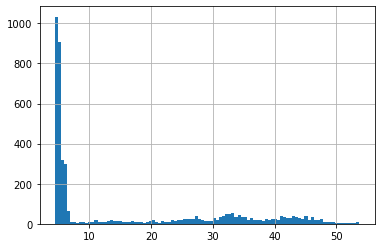

Plot for column "avg_time_charging_lag2"


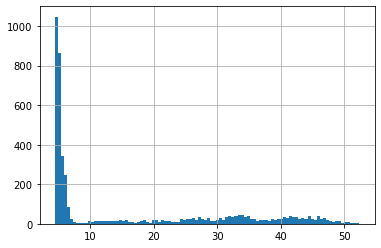

Plot for column "avg_time_charging_lag3"


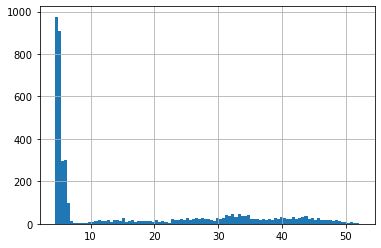

Plot for column "avg_time_charging_lag7"


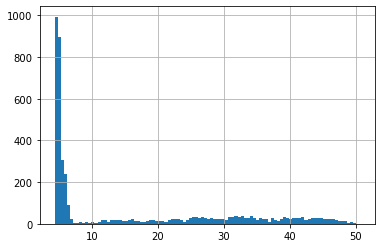

Plot for column "charging_rate_lag3"


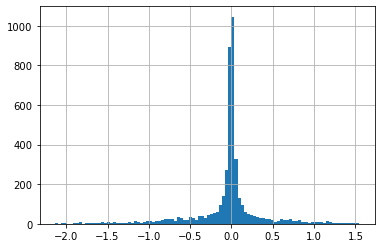

Plot for column "charging_rate_lag7"


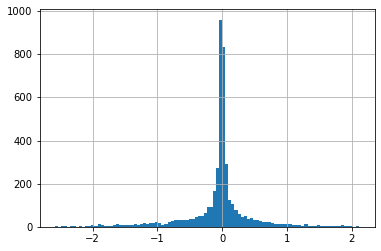

Plot for column "avg_time_discharging_lag1"


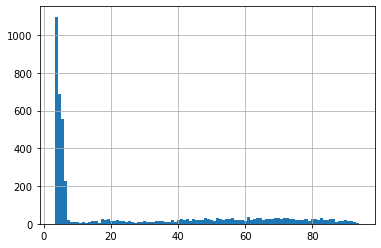

Plot for column "avg_time_discharging_lag2"


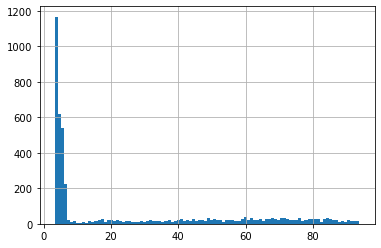

Plot for column "avg_time_discharging_lag3"


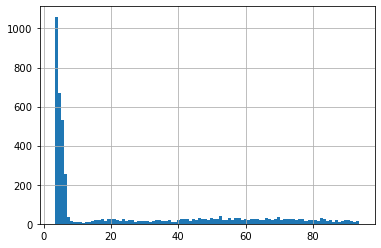

Plot for column "avg_time_discharging_lag7"


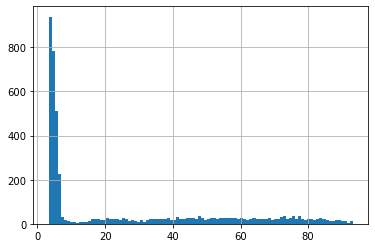

Plot for column "discharging_rate_lag3"


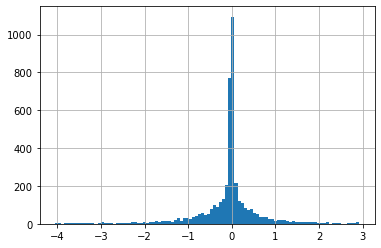

Plot for column "discharging_rate_lag7"


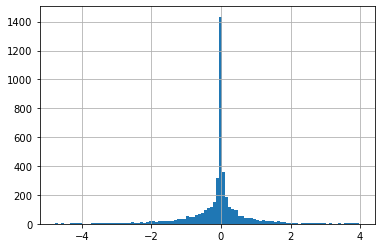

Plot for column "avg_time_charging_lag4"


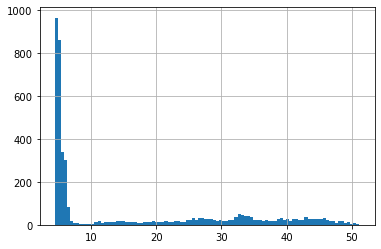

Plot for column "avg_time_discharging_lag4"


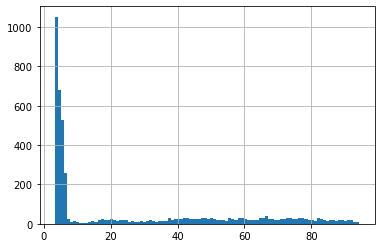

Plot for column "avg_time_charging_lag5"


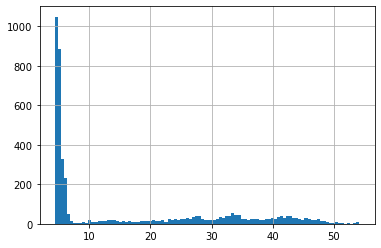

Plot for column "avg_time_discharging_lag5"


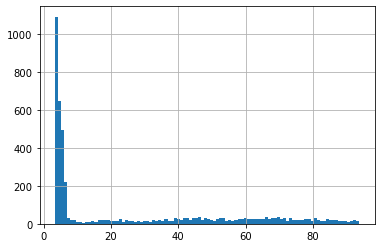

Plot for column "avg_time_charging_lag6"


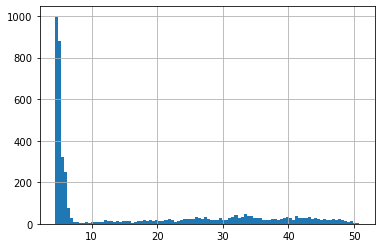

Plot for column "avg_time_discharging_lag6"


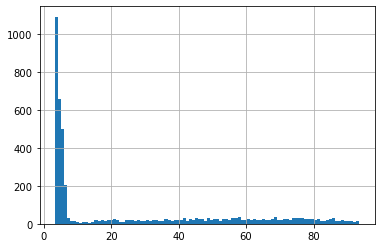

Plot for column "avg_time_charging_lag8"


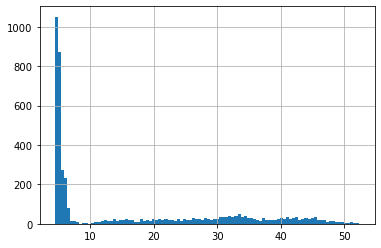

Plot for column "avg_time_discharging_lag8"


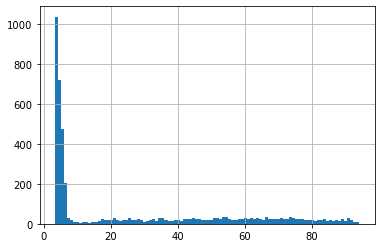

Plot for column "avg_time_charging_lag9"


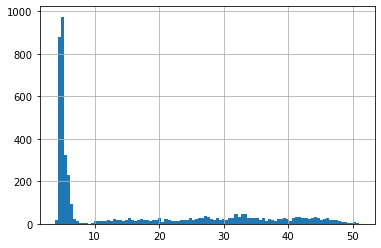

Plot for column "avg_time_discharging_lag9"


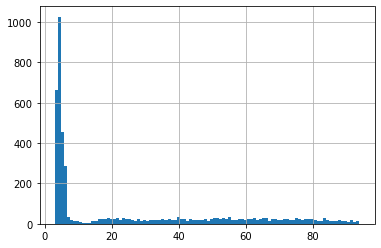

Plot for column "avg_time_charging_lag10"


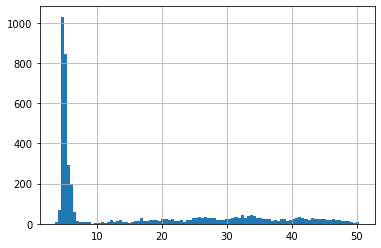

Plot for column "avg_time_discharging_lag10"


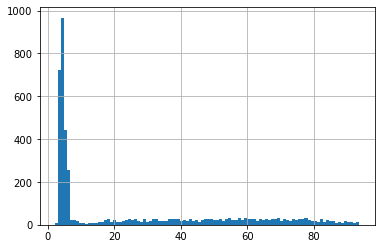

Plot for column "avg_time_charging_lag11"


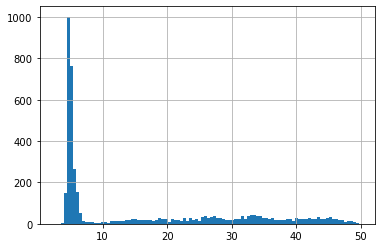

Plot for column "avg_time_discharging_lag11"


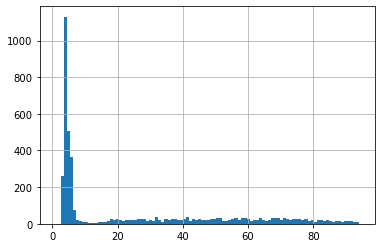

Plot for column "avg_time_charging_lag12"


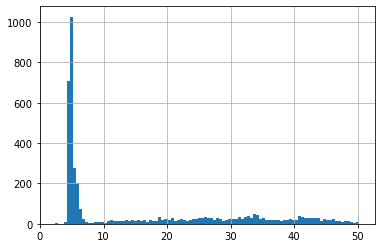

Plot for column "avg_time_discharging_lag12"


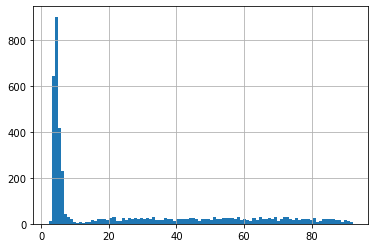

Plot for column "avg_time_charging_lag13"


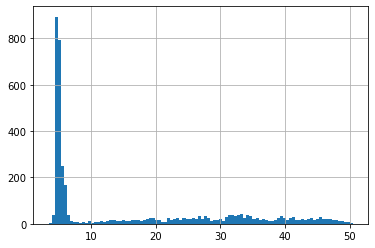

Plot for column "avg_time_discharging_lag13"


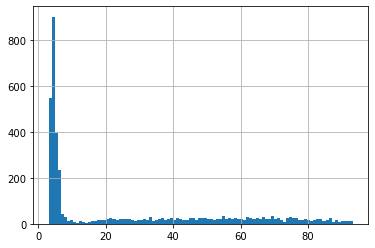

Plot for column "avg_time_charging_lag14"


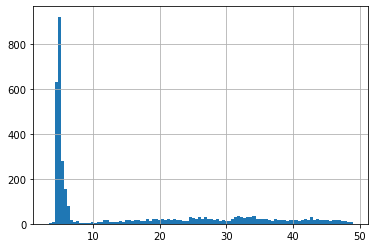

Plot for column "avg_time_discharging_lag14"


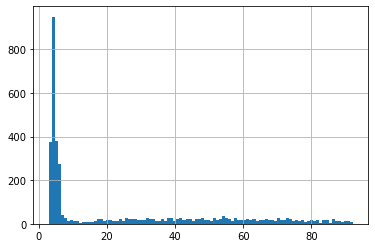

Plot for column "discharging_rate_lag4"


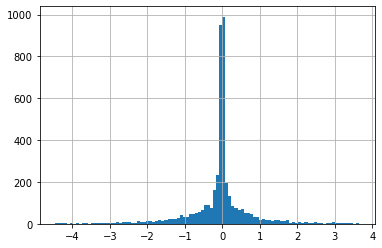

Plot for column "discharging_rate_lag5"


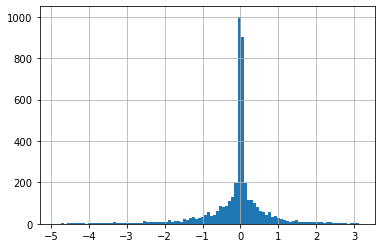

Plot for column "discharging_rate_lag6"


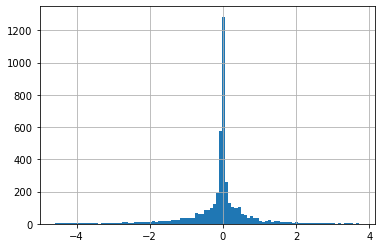

Plot for column "discharging_rate_lag8"


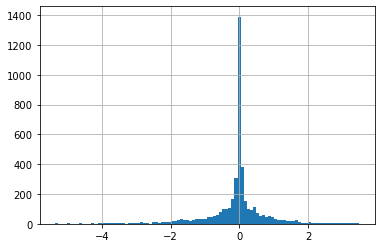

Plot for column "charging_rate_lag4"


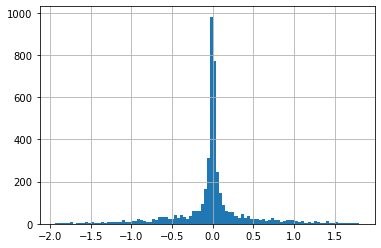

Plot for column "charging_rate_lag5"


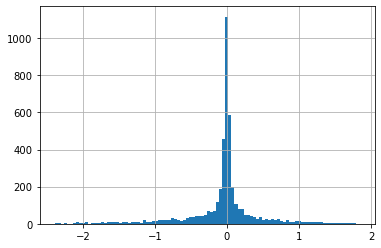

Plot for column "charging_rate_lag6"


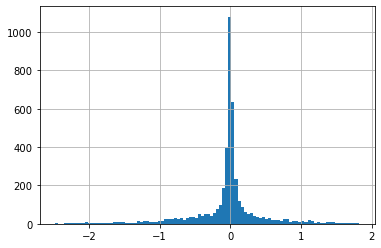

Plot for column "chargecycles"


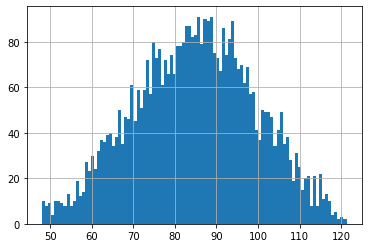

Plot for column "dischargecycles"


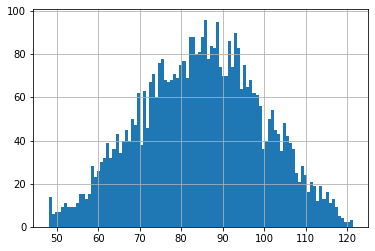

Plot for column "total_off_time"


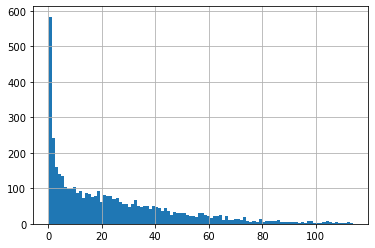

Plot for column "number_times_restart"


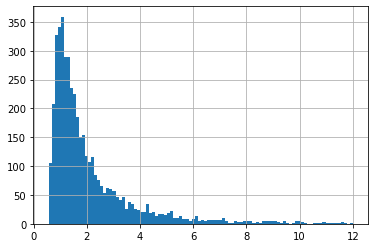

Plot for column "avg_volt_change_charging"


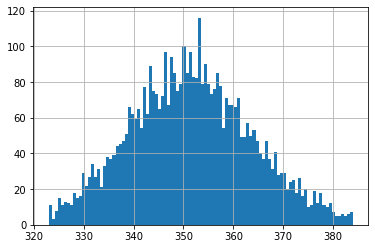

Plot for column "avg_volt_change_discharging"


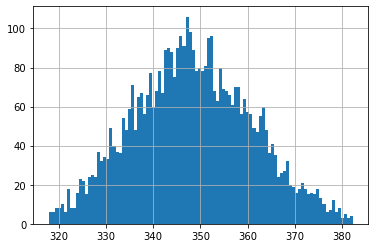

Plot for column "avg_time_charging"


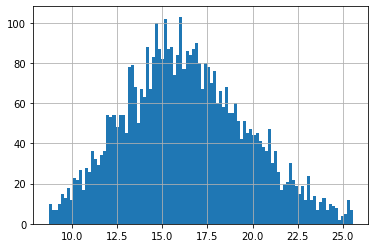

Plot for column "avg_time_discharging"


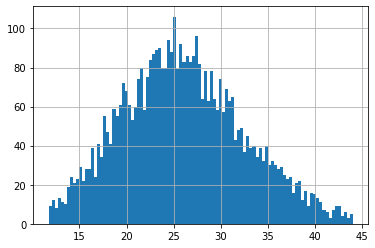

Plot for column "max_voltage_day"


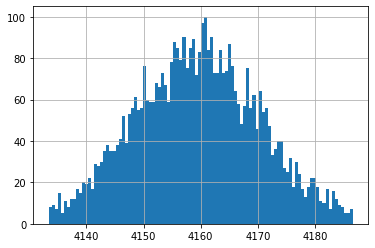

Plot for column "piececount"


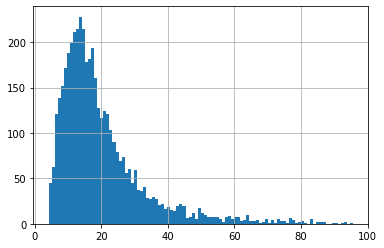

Plot for column "cycle_time"


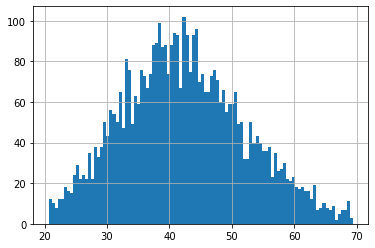

Plot for column "DaysInService"


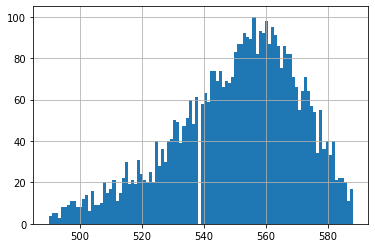

In [23]:
for col in tsno_o.columns:
    hist = tsno_o[col].hist(bins=100)
    print("Plot for column \"{}\"".format(col))
    plt.show()

In [24]:
tr.dtypes

deviceid                                int64
avg_time_charging_lag1                float64
avg_time_charging_lag2                float64
avg_time_charging_lag3                float64
avg_time_charging_lag7                float64
charging_rate_lag3                    float64
charging_rate_lag7                    float64
avg_time_discharging_lag1             float64
avg_time_discharging_lag2             float64
avg_time_discharging_lag3             float64
avg_time_discharging_lag7             float64
discharging_rate_lag3                 float64
discharging_rate_lag7                 float64
fail_7                                  int64
charge_cycle_time_below_12               bool
avg_time_charging_lag4                float64
avg_time_discharging_lag4             float64
avg_time_charging_lag5                float64
avg_time_discharging_lag5             float64
avg_time_charging_lag6                float64
avg_time_discharging_lag6             float64
avg_time_charging_lag8            

In [25]:
tr = pd.get_dummies(tr,drop_first=True,prefix_sep='_') 
tr.columns

Index(['deviceid', 'avg_time_charging_lag1', 'avg_time_charging_lag2',
       'avg_time_charging_lag3', 'avg_time_charging_lag7',
       'charging_rate_lag3', 'charging_rate_lag7', 'avg_time_discharging_lag1',
       'avg_time_discharging_lag2', 'avg_time_discharging_lag3',
       'avg_time_discharging_lag7', 'discharging_rate_lag3',
       'discharging_rate_lag7', 'fail_7', 'charge_cycle_time_below_12',
       'avg_time_charging_lag4', 'avg_time_discharging_lag4',
       'avg_time_charging_lag5', 'avg_time_discharging_lag5',
       'avg_time_charging_lag6', 'avg_time_discharging_lag6',
       'avg_time_charging_lag8', 'avg_time_discharging_lag8',
       'avg_time_charging_lag9', 'avg_time_discharging_lag9',
       'avg_time_charging_lag10', 'avg_time_discharging_lag10',
       'avg_time_charging_lag11', 'avg_time_discharging_lag11',
       'avg_time_charging_lag12', 'avg_time_discharging_lag12',
       'avg_time_charging_lag13', 'avg_time_discharging_lag13',
       'avg_time_charging_

In [26]:
predictors = ['deviceid', 'avg_time_charging_lag1', 'avg_time_charging_lag2',
       'avg_time_charging_lag3', 'avg_time_charging_lag7',
       'charging_rate_lag3', 'charging_rate_lag7', 'avg_time_discharging_lag1',
       'avg_time_discharging_lag2', 'avg_time_discharging_lag3',
       'avg_time_discharging_lag7', 'discharging_rate_lag3',
       'discharging_rate_lag7', 'charge_cycle_time_below_12',
       'avg_time_charging_lag4', 'avg_time_discharging_lag4',
       'avg_time_charging_lag5', 'avg_time_discharging_lag5',
       'avg_time_charging_lag6', 'avg_time_discharging_lag6',
       'avg_time_charging_lag8', 'avg_time_discharging_lag8',
       'avg_time_charging_lag9', 'avg_time_discharging_lag9',
       'avg_time_charging_lag10', 'avg_time_discharging_lag10',
       'avg_time_charging_lag11', 'avg_time_discharging_lag11',
       'avg_time_charging_lag12', 'avg_time_discharging_lag12',
       'avg_time_charging_lag13', 'avg_time_discharging_lag13',
       'avg_time_charging_lag14', 'avg_time_discharging_lag14',
       'discharging_rate_lag4', 'discharging_rate_lag5',
       'discharging_rate_lag6', 'discharging_rate_lag8', 'charging_rate_lag4',
       'charging_rate_lag5', 'charging_rate_lag6', 'chargecycles',
       'dischargecycles', 'total_off_time', 'number_times_restart',
       'avg_volt_change_charging', 'avg_volt_change_discharging',
       'avg_time_charging', 'avg_time_discharging', 'max_voltage_day',
       'piececount', 'cycle_time',
       'DaysInService']
outcome = 'fail_7'

In [27]:
X = tr[predictors]
y = tr[outcome]
X.shape

(40500, 53)

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree

DecisionTree = DecisionTreeClassifier(max_depth = 4)
DecisionTree.fit(train_X, train_y)

plotDecisionTree(DecisionTree, feature_names=train_X.columns)

no display found. Using non-interactive Agg backend


'You need to install pydotplus to visualize decision trees'

In [30]:
importances = DecisionTree.feature_importances_

im = pd.DataFrame({'feature': train_X.columns, 'importance': importances})
im = im.sort_values('importance',ascending=False)
print(im)

                        feature  importance
13   charge_cycle_time_below_12    0.448717
11        discharging_rate_lag3    0.392954
5            charging_rate_lag3    0.125991
45     avg_volt_change_charging    0.021470
43               total_off_time    0.002775
38           charging_rate_lag4    0.002613
44         number_times_restart    0.002421
35        discharging_rate_lag5    0.001893
0                      deviceid    0.001167
39           charging_rate_lag5    0.000000
34        discharging_rate_lag4    0.000000
33   avg_time_discharging_lag14    0.000000
32      avg_time_charging_lag14    0.000000
31   avg_time_discharging_lag13    0.000000
30      avg_time_charging_lag13    0.000000
36        discharging_rate_lag6    0.000000
37        discharging_rate_lag8    0.000000
42              dischargecycles    0.000000
40           charging_rate_lag6    0.000000
41                 chargecycles    0.000000
28      avg_time_charging_lag12    0.000000
46  avg_volt_change_discharging 

In [31]:
for feat in tr.columns:
    print(feat)
    print(tr.groupby('fail_7')[feat].mean())
    #plt.show()

deviceid
fail_7
0    27541.526287
1    27410.692054
Name: deviceid, dtype: float64
avg_time_charging_lag1
fail_7
0    16.398083
1    15.867142
Name: avg_time_charging_lag1, dtype: float64
avg_time_charging_lag2
fail_7
0    16.551329
1    16.422707
Name: avg_time_charging_lag2, dtype: float64
avg_time_charging_lag3
fail_7
0    16.293708
1    16.223838
Name: avg_time_charging_lag3, dtype: float64
avg_time_charging_lag7
fail_7
0    16.273409
1    16.510465
Name: avg_time_charging_lag7, dtype: float64
charging_rate_lag3
fail_7
0   -0.054242
1   -0.007490
Name: charging_rate_lag3, dtype: float64
charging_rate_lag7
fail_7
0   -0.050990
1   -0.059656
Name: charging_rate_lag7, dtype: float64
avg_time_discharging_lag1
fail_7
0    26.045640
1    24.991407
Name: avg_time_discharging_lag1, dtype: float64
avg_time_discharging_lag2
fail_7
0    26.412394
1    26.158959
Name: avg_time_discharging_lag2, dtype: float64
avg_time_discharging_lag3
fail_7
0    25.958540
1    25.721961
Name: avg_time_dischar

DataError: No numeric types to aggregate

In [32]:
for feat in tr.columns:
    print(feat)
    print(tr.groupby('fail_7')[feat].mean())
    #plt.show()


deviceid
fail_7
0    27541.526287
1    27410.692054
Name: deviceid, dtype: float64
avg_time_charging_lag1
fail_7
0    16.398083
1    15.867142
Name: avg_time_charging_lag1, dtype: float64
avg_time_charging_lag2
fail_7
0    16.551329
1    16.422707
Name: avg_time_charging_lag2, dtype: float64
avg_time_charging_lag3
fail_7
0    16.293708
1    16.223838
Name: avg_time_charging_lag3, dtype: float64
avg_time_charging_lag7
fail_7
0    16.273409
1    16.510465
Name: avg_time_charging_lag7, dtype: float64
charging_rate_lag3
fail_7
0   -0.054242
1   -0.007490
Name: charging_rate_lag3, dtype: float64
charging_rate_lag7
fail_7
0   -0.050990
1   -0.059656
Name: charging_rate_lag7, dtype: float64
avg_time_discharging_lag1
fail_7
0    26.045640
1    24.991407
Name: avg_time_discharging_lag1, dtype: float64
avg_time_discharging_lag2
fail_7
0    26.412394
1    26.158959
Name: avg_time_discharging_lag2, dtype: float64
avg_time_discharging_lag3
fail_7
0    25.958540
1    25.721961
Name: avg_time_dischar

DataError: No numeric types to aggregate

deviceid
avg_time_charging_lag1
avg_time_charging_lag2
avg_time_charging_lag3
avg_time_charging_lag7
charging_rate_lag3
charging_rate_lag7
avg_time_discharging_lag1
avg_time_discharging_lag2
avg_time_discharging_lag3
avg_time_discharging_lag7
discharging_rate_lag3
discharging_rate_lag7


/Users/macdaniel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.
/Users/macdaniel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.
/Users/macdaniel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.
/Users/macdaniel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.
/Users/macdaniel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarn

fail_7
charge_cycle_time_below_12
avg_time_charging_lag4
avg_time_discharging_lag4
avg_time_charging_lag5
avg_time_discharging_lag5
avg_time_charging_lag6
avg_time_discharging_lag6
avg_time_charging_lag8
avg_time_discharging_lag8
avg_time_charging_lag9
avg_time_discharging_lag9
avg_time_charging_lag10
avg_time_discharging_lag10
avg_time_charging_lag11
avg_time_discharging_lag11
avg_time_charging_lag12
avg_time_discharging_lag12
avg_time_charging_lag13
avg_time_discharging_lag13
avg_time_charging_lag14


/Users/macdaniel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.
/Users/macdaniel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.
/Users/macdaniel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.
/Users/macdaniel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.
/Users/macdaniel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarn

avg_time_discharging_lag14
discharging_rate_lag4
discharging_rate_lag5
discharging_rate_lag6
discharging_rate_lag8
charging_rate_lag4
charging_rate_lag5
charging_rate_lag6
chargecycles
dischargecycles
total_off_time
number_times_restart
avg_volt_change_charging
avg_volt_change_discharging
avg_time_charging
avg_time_discharging
max_voltage_day
piececount
cycle_time
LastRecord


/Users/macdaniel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.
/Users/macdaniel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.
/Users/macdaniel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.
/Users/macdaniel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.
/Users/macdaniel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarn

DataError: No numeric types to aggregate

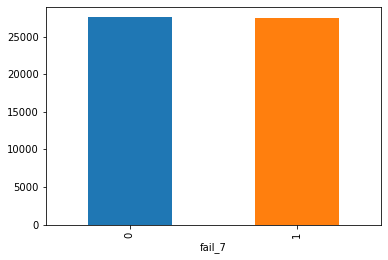

In [36]:
for feat in tr.columns:
    print(feat)
    tr.groupby('fail_7')[feat].mean().plot(kind='bar', label='index',color=['C0', 'C1'])# colormap='Paired')#.bar()
    plt.show()